In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal as scisig
import pickle
import sys
sys.path.append('..')
import matchingpursuit
import signalset

In [2]:
sigset = signalset.SignalSet(data='../../Data/speech_corpora/TIMIT/')

Found  6292  files


In [3]:
mp = matchingpursuit.MatchingPursuer(sigset, use_gammachirps=True)
phi = mp.phi

In [5]:
phi /= np.linalg.norm(phi,axis=1)[:,None]

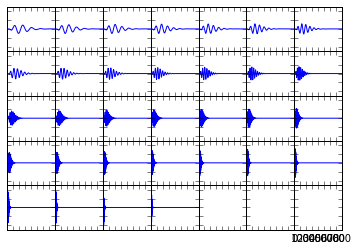

In [6]:
sigset.tiled_plot(phi)

In [12]:
phi.shape

(32, 800, 1)

In [13]:
phi = phi[:,:,0]

In [17]:
convs = []
count=0
for signal in sigset.data:
    #these = [scisig.fftconvolve(elem,signal,mode='full') for elem in phi]
    #convs.append(np.concatenate(these,axis=0))
    convs.append(scisig.fftconvolve(phi,signal[None,:],mode='full'))
    if count > 500:
        break
    count += 1
convs = np.concatenate(convs,axis=1)

In [18]:
convs.shape

(32, 27945377)

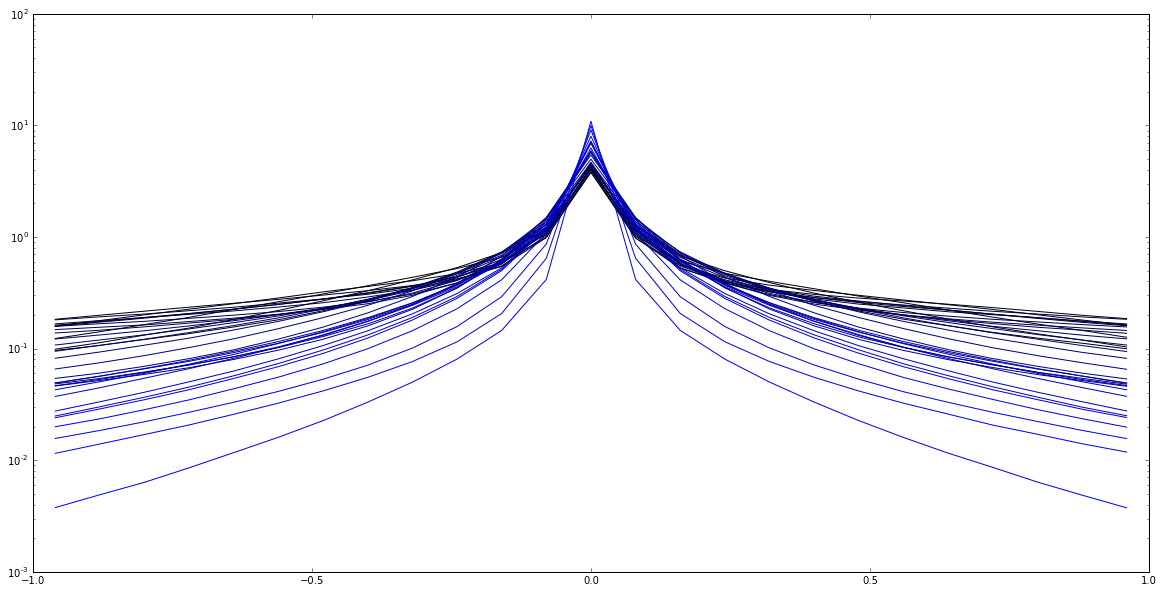

In [23]:
plt.figure(figsize=(20,10))
for ii in range(convs.shape[0]):
    histo, edges = np.histogram(convs[ii], bins=25, range=(-1,1), density=True)
    centers = [(edges[kk]+edges[kk+1])/2 for kk in range(len(edges)-1)]
    plt.plot(centers, histo, color=(0,0,ii/32))
    plt.yscale('log')

In [8]:
def expected_minusabs(A, excess=True):
    """Compute expected value of -|A[...,:]| after normalizing, minus 
    - sqrt(2/pi)
    which is the value for a standard normal distribution, if excess."""
    ans = np.mean(-np.abs(A), axis=-1)
    return ans + np.sqrt(2/np.pi) if excess else ans

In [26]:
B=convs
B -= B.mean(axis=-1)[:,None]
B /= B.std(axis=-1)[:,None]

In [30]:
expected_minusabs(B[0])

0.25951443147481257

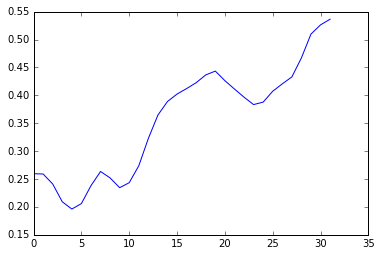

In [31]:
sparsity = [expected_minusabs(b) for b in B]
plt.plot(sparsity)

The trouble with this analysis is I think it would show that basically anything is sparse if there's a lot of silence, which doesn't really say anything about the structure of the sounds that are present. A better calculation might normalize by the power of the sound for each dot product.

In [5]:
noise = np.random.randn(800)
noise /= np.linalg.norm(noise)

In [6]:
convs = []
count=0
for signal in sigset.data:
    convs.append(scisig.fftconvolve(noise,signal,mode='full'))
    if count > 500:
        break
    count += 1
convs = np.concatenate(convs)

In [7]:
convs.shape

(27945377,)

In [9]:
expected_minusabs(convs)

0.26606781330850504

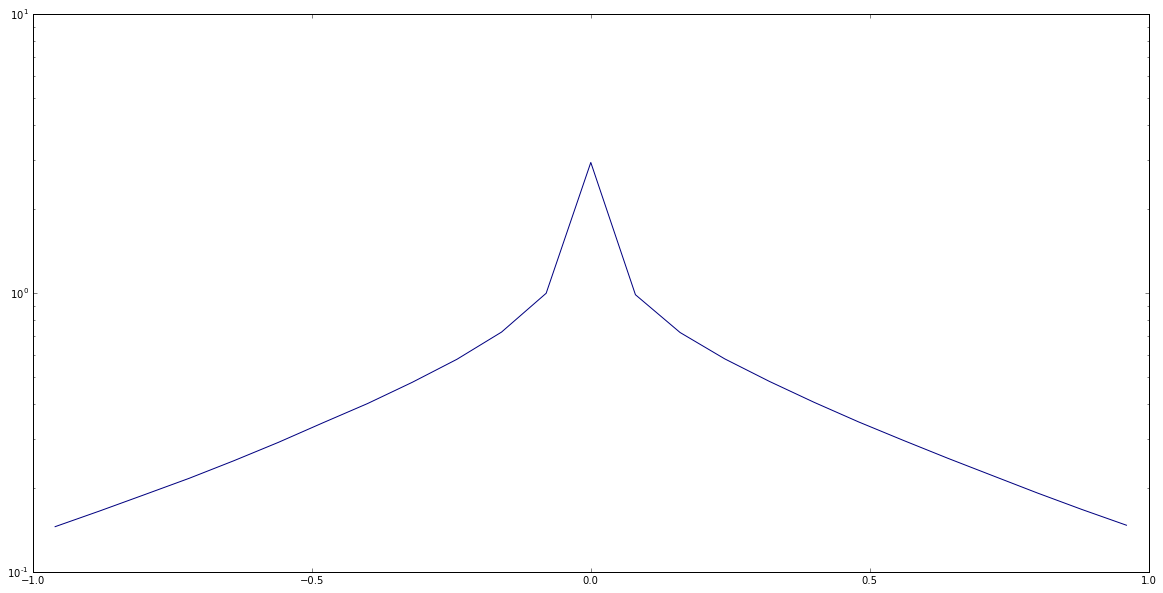

In [10]:
plt.figure(figsize=(20,10))
histo, edges = np.histogram(convs, bins=25, range=(-1,1), density=True)
centers = [(edges[kk]+edges[kk+1])/2 for kk in range(len(edges)-1)]
plt.plot(centers, histo, color=(0,0,0.5))
plt.yscale('log')